# CIÊNCIA DOS DADOS - PROJETO 2: PREDIÇÃO

# Membros do grupo:
* Augusto Rocha Ribeiro

# 1) INTRODUÇÃO

Algo intimamente relacionado a rotina de grande parte das pessoas atualmente são as mídias digitais e plataformas de streaming. E uma ferramenta muito importante para o funcionamento dessas plataformas e satisfação dos clientes com elas é o seu catálogo de produtos.

No caso, estudaremos sobre a plataforma Amazon Prime Video e os programas de TV disponibilizados ou não por ela, de forma que ao final do nosso treinamento, com base nas características dos programas de TV e com técnicas de um **CLASSIFICADOR** (extensão do Naive-Bayes), tentaremos prever, aplicando modelos preditivos numa base de dados para teste, se um programa faz parte ou não da Amazon Prime Video.

# 2) MINERANDO DADOS

A base de dados que será trabalhada foi retirada da plataforma Kaggle, inicialmente contendo informações sobre um total de 24664 programas e com 10 colunas. Porém, houve a necessidade de filtrar esses resultados tanto em questão de quantidade linhas, quando de colunas. As linhas removidas foram as linhas que faltavam informações em suas colunas. E as colunas removidas foram as colunas consideradas não vantajosas para a análise que será realizada neste trabalho.

Ao final da manipulação, foi obtida uma base de dados referente a 9993 programas e com 6 colunas. Todo esse processo de manipulação inicial do dataset se seguirá explicado nos tópico 4.

# 3) CARACTERÍSTICAS DO DATASET

Inicialmente, a base de dados "TV Shows.csv" será explorada com intuito de entender a associação entre algumas de suas variáveis qualitativas. O conjunto de dados, após manipulado, contém informações sobre 9993 programas de TV, os quais apresentam grande diversidade entre si.

O objetivo com essa base de dados é, além de suportar o treinamento e o teste dos classificadores, conseguir classificar quais são as features importantes para que o programa seja ou não considerado para estar presente na plataforma Amazon Prime Video. A seguir, estão as principais colunas do nosso Dataset, as quais estaremos adequando-as aos métodos do Multinomial de Naive-Bayes e da Árvore de Decisão.

* Year: data de lançamento do programa
* Rating: classificação indicativa (idade mínima permitida para assistir ao programa)
* IMDb: avaliação popular (de 1 a 10)
* Rotten Tomatoes: avaliação/crítica profissional (de 0 a 100)
* Genres: gênero do programa
* Amazon Prime Video: se está presente ou não no serviço de streaming da Amazon Prime Video, sendo 1 equivalente a "está presente", e 0 a "não está presente"

# 4) TECNOLOGIAS UTILIZADAS

A fim de tornar o dataset o mais adequado possível para o que busca nossa análise, foram utilizados códigos em Python desenvolvidos pela equipe, se valendo de bibliotecas que foram fundamentais nesse processo. Abaixo, esse processo segue explicado nos subtópicos.

## 4.1) Importando as Bibliotecas

A seguir, bibliotecas que serão úteis para o desenvolvimento do código e suas respectivas funções.

In [1]:
import pandas as pd   # Usada para manipular dataframes

import matplotlib.pyplot as plt   # Usada para plotar gráficos

import numpy as np   # Usada para fazer manipulações matemáticas

from sklearn.naive_bayes import MultinomialNB   # Usada para aplicar o método Multinomial Naive Bayes

from sklearn import tree   # Usada para aplicar o método Decision Tree

from sklearn.model_selection import train_test_split   # Usada para separar o dataframe em uma seção de treino e outra de teste

from pandas_profiling import ProfileReport   # Usada para criar uma janela que contém várias análises sobre o dataframe

## 4.2) Preparando o Dataset

In [2]:
# Lendo o arquivo
arq1 = pd.read_csv('TV Shows.csv')

# Selecionando as partes úteis do arquivo
arq2 = arq1.loc[:, ['Year', 'Rating', 'IMDb', 'Rotten Tomatoes', 'Genre', 'Amazon Prime Video']]

# Retirando as linhas do dataset que apresentam uma coluna sem valor
arq2 = arq2.dropna()

# Reorganizando o index do dataframe, que ficou descontínuo após a remoção de algumas linhas pelo comando acima
arq2 = arq2.reset_index()

# Como a coluna 'index', que foi adicionada pelo comando reset_index(), não será útil na nossa análise, para desconsiderá-la:
arq3 = arq2.loc[:, ['Year', 'Rating', 'IMDb', 'Rotten Tomatoes', 'Genre', 'Amazon Prime Video']]

## 4.3) Limpando a base de dados

Tirando o sinal "+" da coluna Age para cada linha do dataframe:

In [3]:
for i in range(0, len(arq3)):
    
    # SE o valor de "Rating" é igual a "all", então pode-se interpretar que a
    # idade mínima da classificação indicativa do programa é de 0 anos:
    if arq3['Rating'][i] == 'all':
        arq3.loc[i, 'Rating'] = 0
    
    # Para todos os valores de rating, substituir o elemento "+" por uma string vazia
    # (se o valor não tiver o elemento "+", então ele simplesmente permanecerá o mesmo)
    arq3.loc[i, 'Rating'] = float(str(arq3['Rating'][i]).replace('+', ''))
    
    # Assegurando que as demais variáveis numéricas estão no formato float
    arq3.loc[i, 'Year'] = float(arq3['Year'][i])
    arq3.loc[i, 'IMDb'] = float(arq3['IMDb'][i])
    arq3.loc[i, 'Rotten Tomatoes'] = float(arq3['Rotten Tomatoes'][i])


Após essas manipulações iniciais e o entendimento de cada variável do dataset, convém uma visualização da base de dados:

In [4]:
arq3

,Year,Rating,IMDb,Rotten Tomatoes,Genre,Amazon Prime Video
0,2019,18,6.2,81,Action & Adventure,1
1,2019,13,5.7,74,Action & Adventure,1
2,2019,18,6.1,72,Action & Adventure,1
3,2019,18,4.9,50,Action & Adventure,1
4,2019,18,6.1,79,Action & Adventure,1
...,...,...,...,...,...,...
9988,2016,7,6.2,31,Drama,0
9989,2018,7,6.5,42,Drama,0
9990,2016,13,2.1,29,Drama,0
9991,2016,13,5.2,29,Drama,0


## 4.4) Criação da lista de gêneros

Aqui, será feita uma lista com todos os gêneros que aparecem no dataset, sem repetições.

In [5]:
# Por meio de uma tabela, guarda-se os gêneros que a coluna "Genre" apresenta e as suas contagens por todo o dataset
lista_gen = arq3['Genre'].value_counts()

# Por meio de da função "keys()", guarda-se apenas os gêneros da tabela
lista_gen = lista_gen.keys()

# Conversão dos dados do último comando para o formato de lista, para compatibilidade com os próximos comandos
lista_gen = list(lista_gen)

## 4.5) Adição de colunas ao dataset

Agora, para cada elemento da lista de gêneros, será adicionada uma coluna nova no dataframe, correspondente a esse gênero. Essa coluna irá retornar um valor booleano indicando se aquele gênero está presente ou não no programa de TV em questão, "1" significa que está presente, e "0" significa que não está presente.

In [6]:
for i in range(0, len(arq3)):
    
    # Para cada elemento da lista de gêneros
    for g in lista_gen:
        
        # SE o gênero g está presente na coluna "Genre" do dataset para aquela linha, retornar "1" para o valor na nova coluna
        if g in arq3['Genre'][i]:
            arq3.loc[i, g] = 1
        
        # CASO g NÃO esteja presente na coluna "Genre", retornar "0"
        else:
            arq3.loc[i, g] = 0

No tópico seguinte será evidenciada a importância dessa alteração no dataset, mas por hora, vamos ter uma visualização de como ficou o nosso dataset após essas manipulações:

In [7]:
arq3

,Year,Rating,IMDb,Rotten Tomatoes,Genre,Amazon Prime Video,Drama,Action & Adventure,Comedy,Crime,Horror,Documentary,Thriller,Animation,Mystery,Family,Biography,Romance,Fantasy,Anime
0,2019,18,6.2,81,Action & Adventure,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,13,5.7,74,Action & Adventure,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019,18,6.1,72,Action & Adventure,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019,18,4.9,50,Action & Adventure,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019,18,6.1,79,Action & Adventure,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,2016,7,6.2,31,Drama,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9989,2018,7,6.5,42,Drama,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9990,2016,13,2.1,29,Drama,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9991,2016,13,5.2,29,Drama,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 5) ANÁLISE DESCRITIVA

A seguir, serão realizados cruzamentos estatísticos entre Target e Feature, a fim de entendermos como se comporta a nossa variável Target cruzada com cada feature. Para isso, faremos uso de ferramentas estatísticas descritivas, que irão variar da primeira análise (subtópico 5.1) para a segunda (subtópico 5.2). Em todos os casos, a variável Target será a nossa coluna do dataset "Amazon Prime Video".

## 5.1) Variáveis Qualitativas - Qualitativas

Para iniciar a nossa análise já obtendo uma visão geral, será plotado um gráfico de barras que mostra em quantos porcento do total de programas que estão na Amazon Prime Video cada gênero está presente.

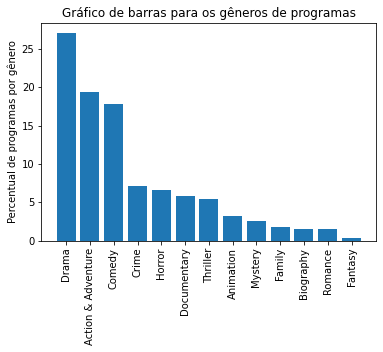

In [8]:
# Como o gênero "Anime" não aparece nem sequer uma vez nos programas da plataforma,
# ele será deletado da lista de gêneros para a execução da análise atual
del(lista_gen[13])

# Faz uma lista de 0 a 13, referente aos índices usados para identificar os gêneros
y = np.arange(len(lista_gen))

# Guarda a contagem de aparições de cada gênero nos programas presentes na plataforma. O argumento "True"
# torna os resultados em frações, e para mostrar esses resultados em percentuais multiplica-se por 100
barras = 100*arq3.loc[arq3['Amazon Prime Video']==1, 'Genre'].value_counts(True)

# Cria barras correspondentes aos percentuais de cada gênero. 
plt.bar(y, barras)

# Nomeia o eixo y
plt.ylabel('Percentual de programas por gênero')

# Dá um título ao gráfico
plt.title('Gráfico de barras para os gêneros de programas')

# Cria nomes no eixo x, deixando-os na vertical
plt.xticks(y, lista_gen, rotation=90)

# Plota o gráfico
plt.show()

Ao analisar o gráfico acima, é visível que os gêneros que detêm o maior percentual de presença nos programas são Drama, Ação e Aventura, Comédia, e Crime. O primeiro se encontra bem acima de todos os outros, os dois intermediários tem valores aparentemente próximos, mas ainda grandes se comparados a maioria dos gêneros, e a partir do quarto (incluindo este) há uma redução bem grande no percentual de programas por gênero.

Para confirmar essa análise, a seguir, será realizada uma tabela cruzada da coluna Amazon Prime Video com esses 4 gêneros que mais aparecem no dataset, esses gêneros serão as nossas Features. A tabela automaticamente é normalizada, isso faz com que cada valor na tabela corresponda a uma fração da linha em questão (0 ou 1, ou 'estar' ou 'não estar' na plataforma), o que nos permite realizar uma análise mais macroscópica e correlativa do problema.

In [9]:
# Guardando apenas a parte que será usada do dataframe para a tabela
pivot = arq3.loc[:, ['Amazon Prime Video', 'Drama', 'Action & Adventure', 'Comedy', 'Crime']]

# Imprimindo a tabela
tab = pd.pivot_table(pivot, index='Amazon Prime Video', margins=True)
tab

,Action & Adventure,Comedy,Crime,Drama
Amazon Prime Video,,,,
0,0.247828,0.299438,0.039346,0.301482
1,0.193380,0.178198,0.070931,0.270035
All,0.204043,0.201941,0.064745,0.276193


Analisando os valores da linha 1 da tabela acima para cada gênero, confirma-se as informações obtidas no gráfico de barras, a porcentagem de Drama ainda é a maior de todas, que é 27,0 %. As porcentagens de Ação e Aventura e de Comédia são menores que a de Drama e são relativamente próximas, elas são, respectivamente 19,3 % e 17,8 %. E finalmente, em Crime já é vista uma grande redução na porcentagem, que abaixa para 7,1 %.

Note que essa foi a importância de termos criado uma coluna para cada gênero no dataset no subtópico 4.5, com essas colunas, pudemos realizar a contagem das ocorrências de cada gênero para o total de programas, e uma análise com essa tabela cruzada se fez possível.

## 5.2) Variáveis Qualitativas - Quantitativas

O código da célula abaixo é uma preparação para a nossa análise, nele criaremos faixas que serão usadas para uma melhor interpretação dos histogramas que serão plotados em seguida.

In [10]:
# Criação de lista numérica, determinando respectivamente início, fim, e intervalo adequados para a variável
faixa1 = np.arange(1912,2027, 6)

# Nova lista para adicionar todos os números da lista anterior em formato
# de string, a fim de enumerar as posições do eixo x do histograma
fs1=[]
for i in faixa1:
    fs1.append(str(i))

    
# ----- REPETIÇÃO DO PROCESSO PARA AS DEMAIS VARIÁVEIS    

faixa2 = np.arange(0,20, 1)
fs2=[]
for i in faixa2:
    fs2.append(str(i))

faixa3 = np.arange(1,11, 0.5)
fs3=[]
for i in faixa3:
    fs3.append(str(i))

faixa4 = np.arange(0,103, 6)
fs4=[]
for i in faixa4:
    fs4.append(str(i))

Com o código a seguir, são plotados os histogramas referentes às 4 variáveis numéricas do nosso dataset. Os histogramas estão sobrepostos cada um com os seus cenários "Presente" e "Ausente" na Amazon Prime Video e estão normalizados, ou seja, seus valores no eixo Y representam frações em relação ao total do respectivo cenário analisado), a fim de proporcionar uma melhora na visualização da comparação entre esses cenários. Todos os histogramas estão identificados sobre qual a variável que está sendo tratada, com os eixos também identificados.

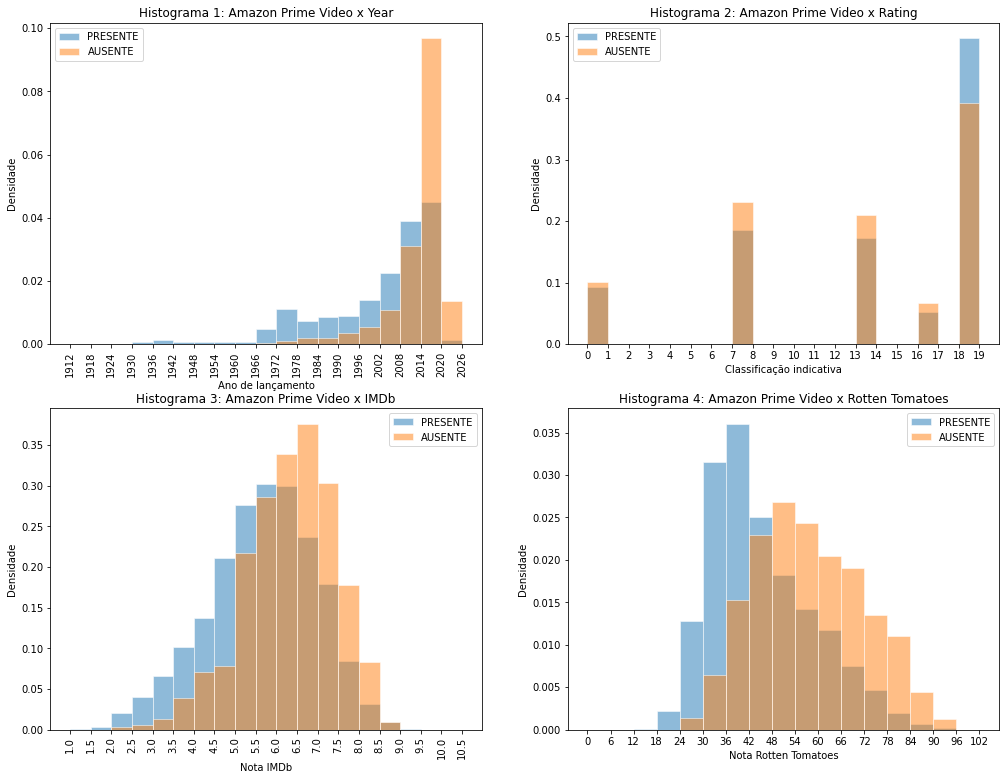

In [11]:
# Criação de uma figura (espaço onde serão plotados os 4 gráficos distribuídos igualmente)
plt.figure(figsize=(17, 13))


# O último algarismo corresponde a posição do histograma em questão na ordem de plots
plt.subplot(221)

# Criação das barras
plt.hist(arq3.loc[arq3['Amazon Prime Video']==1, 'Year'], bins=faixa1, density=True, edgecolor='white', alpha=0.5, label='PRESENTE')
plt.hist(arq3.loc[arq3['Amazon Prime Video']==0, 'Year'], bins=faixa1, density=True, edgecolor='white', alpha=0.5, label='AUSENTE')

# Enumera as posições do eixo X de acordo com as variáveis criadas na última célula
plt.xticks(faixa1, fs1, rotation=90)

# Dá titulo ao histograma
plt.title('Histograma 1: Amazon Prime Video x Year')

# Dá nome a cada eixo
plt.xlabel('Ano de lançamento')
plt.ylabel('Densidade')

# Identifica cada barra (""PRESENTE" ou "FALTANTE") com uma caixa de legenda
plt.legend()


# ----- REPETIÇÃO DO PROCESSO PARA AS DEMAIS VARIÁVEIS 

plt.subplot(222)
plt.hist(arq3.loc[arq3['Amazon Prime Video']==1, 'Rating'], bins=faixa2, density=True, edgecolor='white', alpha=0.5, label='PRESENTE')
plt.hist(arq3.loc[arq3['Amazon Prime Video']==0, 'Rating'], bins=faixa2, density=True, edgecolor='white', alpha=0.5, label='AUSENTE')
plt.xticks(faixa2, fs2)
plt.title('Histograma 2: Amazon Prime Video x Rating')
plt.xlabel('Classificação indicativa')
plt.ylabel('Densidade')
plt.legend()

plt.subplot(223)
plt.hist(arq3.loc[arq3['Amazon Prime Video']==1, 'IMDb'], bins=faixa3, density=True, edgecolor='white', alpha=0.5, label='PRESENTE')
plt.hist(arq3.loc[arq3['Amazon Prime Video']==0, 'IMDb'], bins=faixa3, density=True, edgecolor='white', alpha=0.5, label='AUSENTE')
plt.xticks(faixa3, fs3, rotation=90)
plt.title('Histograma 3: Amazon Prime Video x IMDb')
plt.xlabel('Nota IMDb')
plt.ylabel('Densidade')
plt.legend()

plt.subplot(224)
plt.hist(arq3.loc[arq3['Amazon Prime Video']==1, 'Rotten Tomatoes'], bins=faixa4, density=True, edgecolor='white', alpha=0.5, label='PRESENTE')
plt.hist(arq3.loc[arq3['Amazon Prime Video']==0, 'Rotten Tomatoes'], bins=faixa4, density=True, edgecolor='white', alpha=0.5, label='AUSENTE')
plt.xticks(faixa4, fs4)
plt.title('Histograma 4: Amazon Prime Video x Rotten Tomatoes')
plt.xlabel('Nota Rotten Tomatoes')
plt.ylabel('Densidade')
plt.legend()


# Mostra os histogramas
plt.show()

Com os histogramas plotados, vamos agora a uma análise dos comportamentos das variáveis Features (Year, Rating, IMDb, Rotten Tomatoes) com a variável Target (Amazon Prime Video):


* Para o Histograma 1, as situações iniciais que se observam é que os programas estão proporcionalmente mais presentes do que ausentes na plataforma, porém, tal situação vai se invertendo com o passar do tempo, inversão essa que se mostra bem acentuada nos últimos anos. Esse comportamente é compreensível, visto que os programas lançados mais recentemente comumente não vão direto para as plataformas de streaming, há um certo período de tempo para haver essa inclusão do programa nas plataformas, por exemplo para que haja o lucro desse programa em outros meios (para filmes, por exemplo têm-se as bilheterias de cinema).


* Para o Histograma 2, percebe-se que somente os programas com classificação indicativa para maiores de 18 anos estão proporcionalmente mais presentes do que ausentes na Amazon Prime Video. Porém, vale ressaltar que para as outras classificações indicativas essa diferença não é tão acentuada entre os 2 cenários.


* Para o Histograma 3, para ambos os cenários (presente ou não na plataforma), percebe-se que até uma certa nota IMDb, que se encontra numa região intermediária, conforme ela aumenta, a quantidade de programas também aumenta, e após tal nota na região intermediária, há o decaimento da quantidade para ambos os cenários também. Esse é um resultado compreensível pois as probabilidades de programas atingirem notas muito altas ou muito baixas são menores, pois isso requer performances irregulares dos programas, assim, a média de notas tende a se concentrar nas regiões intermediárias.


* Para o Histograma 4, há um comportamento quase que semelhante ao histograma 3, porém, como esse histograma se trata de uma avaliação realizada por críticos, e não por internautas como o IMDb, pode haver mais tópicos a se pontuar. É visível que para os programas cujas notas são de 48 para cima, os programas ausentes são consideravelmente maiores (proporcionalmente falando) que os programas presentes. Isso não necessariamente significa que a Amazon Prime Video é uma plataforma de baixa qualidade, pois podem haver fatores externos a se considerar, como por exemplo a concorrência desse mercado. Plataformas como Netflix, Disney+, entre outras, podem pegar boa parte desses programas com boas notas dos críticos, por isso é coerente que apenas a Amazon Prime Video não vá possuir sozinha a maioria dos programas com altas classificações.

# 6) MODELOS DE PREDIÇÃO

## 6.1) Método da Multinomial de Naive-Bayes

Esse classificador aplica um modelo de probabilidade condicional e é totalmente adequado para a classificação de valores discretos e sejam independentes (que é o que temos no nosso caso!). A simplicidade desse modelo, como pode se ver no código abaixo, viabiliza o seu uso para predições em longas bases de dados, de maneira concisa e eficiente,

In [12]:
# Definindo variáveis features
X = arq3.loc[:, ['Year', 'Rating', 'IMDb', 'Rotten Tomatoes'] + lista_gen]

# Definindo variável Target
Y = arq3.loc[:, 'Amazon Prime Video']

# Separando a base de dados em seções de treino e teste, individualmente para o X e Y definidos acima. "test_size" corresponde
# ao tamanho da seção de teste, que foi definido como 20 % do total do dataset. E o último argumento "random_state"
# realiza um embaralhamento do dataset, a fim de que não se obtenha resultados tendenciosos posteriormente.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Aplica o Classificador Multinomial de Naive Bayes nos X e Y fornecidos
modelo = MultinomialNB().fit(X_train, Y_train)

# Obtém o resultado final
result =  modelo.score(X_test, Y_test)
result

0.7478739369684843

## 6.2) Método da Árvore de Decisão

Ao aplicar o algorítimo da Árvore de Decisão, obtém-se um modelo preditivo preciso e que considera os valores não lineares, essa ponderação automática do programa com os valores não lineares facilita a sua aplicação. Assim, acaba-se por ter nesse modelo uma tal versatilidade que permite que ele seja aplicado tanto como um classificador quanto um modelo de regressão (mas lembrando que aqui será usado como CLASSIFICADOR), e funcionando para variáveis que sejam elas aleatórias ou contínuas. Abaixo, tem-se o código de aplicação desse método no nosso dataset. O código desse modelo, assim como o código para o modelo Multinomial de Naive Bayes, também é bem conciso. E aqui também se aproveita os X e Y criados para a última aplicação, isso não impacta negativamente na resposta final da aplicação desse método.

In [13]:
# Aplica o Classificador da Árvore de Decisão nos X e Y fornecidos
modelo2 = tree.DecisionTreeClassifier().fit(X_train,Y_train)

# Obtém o resultado final
result2 = modelo2.score(X_test,Y_test)
result2

0.7998999499749875

## 6.3) Comparação dos modelos

In [14]:
print(f'Para o método da Multinomial de Naive Bayes, obteve-se uma acurácia de {result}')
print(f'Para o método da Árvore de Decisão, obteve-se uma acurácia de {result2}')

Para o método da Multinomial de Naive Bayes, obteve-se uma acurácia de 0.7478739369684843
Para o método da Árvore de Decisão, obteve-se uma acurácia de 0.7998999499749875


Analisando as precisões média nos dados de treino e teste fornecidos para cada modelo, concluí-se que os valores obtidos não ficaram muito distantes entre si. Ainda, não houve underfitting, ambos os modelos acertaram um percentual bom das informações de teste, chamando a atenção para o fato de que em nenhum dos modelos ocorreu overfitting, que pode parecer algo bom inicialmente, mas que depois se conclui que é algo negativo para o desempenho do modelo em novos dados.


# 7) CONCLUSÃO

Levando em conta os resultados obtidos, foi possível ao longo do projeto analisar quais são as características de um programa que são importantes para definir se ele vai ou não para a Amazon Prime Video. As diferentes aplicações de ferramentas estatísticas moldadas ao contexto foram muito significativas para que a análise não fosse feita de maneira unilateral e tendenciosa, tanto na parte de variáveis quantitativas com qualitativas quanto na parte de variáveis qualitativas com qualitativas. Esse conjunto de análises críticas e macroscópicas com diversos artifícios implementados ao longo do projeto foi essencial para obter o resultado que se teve com os modelos de classificação.


# 8) REFERÊNCIAS

Abaixo, têm-se as referências de todas as pesquisas feitas e estudadas que foram relevantes para o desenvolvimento do projeto:

https://www.kaggle.com/jyotmakadiya/popular-movies-and-tv-shows-amazon-prime-netflix

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

https://www.python-graph-gallery.com/barplot/#:~:text=A%20barplot%20shows%20the%20relationship,Python%20%2C%20using%20Matplotlib%20and%20Seaborn%20

http://excript.com/python/incluindo-alterando-excluindo-elementos-lista-python.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

https://machinelearningmastery.com/overfitting-and-underfitting-with-machine-learning-algorithms/